# Multi-Layer Perceptron (Neural Net)

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
import warnings

# Display progress logs on stdout.
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

warnings.filterwarnings('ignore')

ImportError: cannot import name cbook

In [2]:
def classify_ratings(y):
    y = y - y.min()
    y /= y.max()
    y *= 10
    
    return y

In [3]:
def load_data():
    imp = Imputer(missing_values=np.nan, strategy='most_frequent')
    train_df = pd.read_csv('/home/vamshi/PycharmProjects/YelpChallenge/yelp_dataset/businesses_train.csv')
    test_df = pd.read_csv('/home/vamshi/PycharmProjects/YelpChallenge/yelp_dataset/businesses_test.csv')
    data = train_df.append(test_df)
    result = data['rating'].values
    data = data.drop(['business_id','categories','rating'], axis = 1)
    data = data.values
    
    return imp.fit_transform(data), classify_ratings(result)

In [4]:
def scale_input_data(X, how='scaler', range=(1, 10)):
    if how == 'scaler':
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler(range)
        
    return scaler.fit_transform(X)

In [5]:
data = load_data()
X = scale_input_data(data[0])
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

/home/vamshi/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<h2>Scikit-Learn</h2>

<h3>MLPRegressor</h3>

In [6]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(solver='adam', hidden_layer_sizes=(128, 32, 10), 
                   max_iter=100, shuffle=True, random_state=1, activation='relu', 
                   alpha=0.1, learning_rate='adaptive', beta_1=0.7, beta_2=0.8)

mlp.fit(X_train, y_train)
print("MLPRegressor RMSE:", mean_squared_error(mlp.predict(X_test), y_test) ** .5)

/home/vamshi/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


('MLPRegressor RMSE:', 0.9797351124811278)


### MLPClassifier

In [8]:
from sklearn.neural_network import MLPClassifier

for i in (1, 2):
    y_train2 = np.rint(y_train / i)
    y_test2 = np.rint(y_test / i)
    
    clf = MLPClassifier(solver='adam', hidden_layer_sizes=(128, 32, 10), 
                        max_iter=100, shuffle=True, random_state=1, activation='relu', 
                        alpha=0.1, learning_rate='adaptive', beta_1=0.7, beta_2=0.8)
    clf.fit(X_train, y_train2)

    print(clf.score(X_test, y_test2))

0.41411964241546234
0.6968658351295007


## Tensorflow

### Keras API

In [24]:
# import tensorflow.google as tf  # Uncomment this line when you join Google :-)
import tensorflow as tf
from tensorflow import keras

In [26]:
data = load_data()
X = data[0]
y = data[1]

# Tensorflow recommended scaling.
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std
X = (X - mean) / std

In [100]:
layers = [
    keras.layers.Dense(500, activation=tf.nn.relu, input_shape=(X.shape[1],))
]
layers.extend([
    keras.layers.Dense(dim, activation=tf.nn.relu) 
    for dim in [200, 100, 50, 10]
])
layers.append(keras.layers.Dense(1))

model = keras.Sequential(layers)

optimizer = tf.train.AdamOptimizer(0.01)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mse', 'mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 500)               25500     
_________________________________________________________________
dense_115 (Dense)            (None, 200)               100200    
_________________________________________________________________
dense_116 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_117 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_118 (Dense)            (None, 10)                510       
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 11        
Total params: 151,371
Trainable params: 151,371
Non-trainable params: 0
_________________________________________________________________


In [101]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# Store training stats
history = model.fit(X, y, epochs=20,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................

In [102]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])

In [105]:
history.history['val_mean_squared_error'][-1] ** .5

1.018130538767898

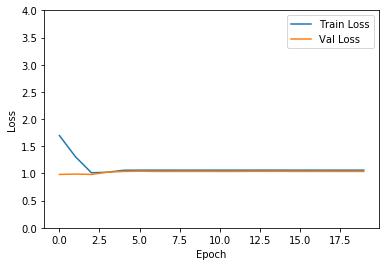

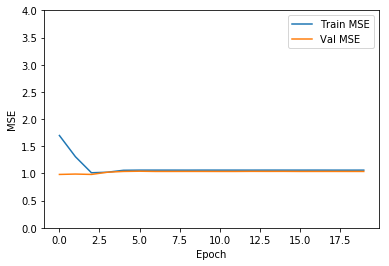

In [109]:
for k, label in [('loss', 'Loss'), ('mean_squared_error', 'MSE')]:
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel(label)
    plt.plot(history.epoch, np.array(history.history[k]),
           label=f'Train {label}')
    plt.plot(history.epoch, np.array(history.history['val_mean_squared_error']),
           label=f'Val {label}')
    plt.ylim([0, 4])
    plt.legend()

plt.show()

### DNNRegressor Estimator

In [ ]:
# I need to overhaul the data and use tf's APIs to featurize these cols.

# Also I need to do SVD on the category - rating matrix 

# Check smaller features and see whether they make a difference to the rating.

# Determine important features - train the model only on these - require the user to specify the same attributes 
# during prediction
# Model predicts on the same attributes - identify cluster to which new Res belongs to 
# take those restaurants in that cluster with higher rating and compare attributes 

# redo preprocessing script to allow more freedom when featurizing.
